In [2]:
# Import packages

import pandas as pd 
import numpy as np 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from scipy import stats

from joblib import dump, load

pd.set_option('display.max_columns', None)

C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
nfl = pd.read_csv('../../data/nfl_game_by_game_raw_stats.csv')

In [4]:
nfl.head()

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,total_rushes,total_rush_yards,rushing_epa,rush_tds,qb_epa,qb_rush_yards,qb_rushing_epa,qb_rush_tds,total_qb_rush_attempts,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,sacks_allowed_team,qb_hits_allowed_team,fumbles_team,lost_fumbles_team,interceptions_thrown_team,total_rushes_allowed,total_rush_yards_allowed,rushing_epa_allowed,rush_tds_allowed,total_pass_attempts_allowed,passing_yards_allowed,completions_allowed,passing_epa_allowed,pass_tds_allowed,air_yards_allowed,yards_after_catch_allowed,air_epa_allowed,yac_epa_allowed,avg_cpoe_allowed,qb_epa_allowed,qb_rush_yards_allowed,qb_rushing_epa_allowed,qb_rush_tds_allowed,sacks,qb_hits,fumbles_forced,interceptions,fumbles_recovered,special_teams_epa,total_epa,total_opposing_epa
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,26,110.0,-7.697317,0.0,7.779734,30.0,1.681309,0.0,3.0,2.0,4.0,1.0,1.0,0.0,2.0,4.0,2.0,2.0,0.0,24,52.0,-8.805075,1.0,36,238.0,21.0,0.799435,1.0,148.0,90.0,8.328671,10.101167,-6.609174,-1.749010,10.0,-2.548446,0.0,0.0,4.0,0.0,1.0,0.0,-4.751772,1.654976,-1.654976
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,25,123.0,2.559394,1.0,24.116820,15.0,0.272050,0.0,3.0,1.0,4.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,0.0,28,139.0,4.264254,3.0,42,333.0,29.0,9.202585,1.0,141.0,192.0,1.711281,22.435846,-0.291977,13.906331,2.0,-0.387024,0.0,0.0,0.0,1.0,1.0,1.0,-1.162613,5.183908,-5.183908
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,21,94.0,-0.093163,1.0,-3.078329,7.0,1.793058,0.0,3.0,3.0,6.0,0.0,0.0,1.0,3.0,6.0,1.0,1.0,1.0,24,81.0,-4.888501,0.0,39,303.0,25.0,11.252418,1.0,129.0,172.0,-3.613447,26.073280,-2.044220,7.354762,5.0,-3.897657,0.0,0.0,1.0,0.0,0.0,0.0,-2.107624,-13.436091,13.436091
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,31,197.0,4.315138,1.0,0.591515,23.0,0.222908,1.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0,18,86.0,-0.055888,0.0,49,349.0,34.0,-6.755498,2.0,159.0,190.0,3.427141,16.035978,2.864331,0.058386,0.0,0.000000,0.0,2.0,4.0,1.0,2.0,1.0,3.721131,15.216262,-15.216262
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,33,113.0,-6.247634,0.0,10.352312,10.0,1.929123,0.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,17,102.0,1.025410,0.0,35,183.0,22.0,-10.437735,2.0,138.0,45.0,6.082325,4.351872,0.519191,-3.645375,27.0,2.277812,0.0,3.0,9.0,2.0,2.0,1.0,-3.457676,8.130204,-8.130204


In [5]:
# Previous iteration tried to predict passing value using a modeling approach. The issue I found with this is that it 
# is difficult to create a label corresponding to a "good" quarterback game. In this approach, the focus will be 
# transforming the necessary features using scaling/normalization/etc. This approach should result in minimal changes
# to the actual value of the feature, just changing the representation.

In [6]:
# Get only passing related stats for qbs that threw more than 10 passes in the game

passing = nfl.copy()
passing = passing[['season', 'week', 'team', 'opponent', 'score', 'opponent_score', 'qb', 'total_pass_attempts', 'total_passing_yards',
        'completions', 'passing_epa', 'pass_tds', 'air_yards', 'yards_after_catch', 'air_epa', 'yac_epa', 'avg_cpoe',
        'qb_epa', 'total_qb_rush_attempts', 'qb_rush_yards', 'qb_rushing_epa', 'qb_rush_tds', 'sacks_taken_qb', 'qb_hits_taken_qb', 'fumbles_qb',
        'lost_fumbles_qb', 'interceptions_thrown_qb']]
passing = passing[passing.total_pass_attempts > 10]
passing

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,7.779734,3.0,30.0,1.681309,0.0,2.0,4.0,1.0,1.0,0.0
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,24.116820,3.0,15.0,0.272050,0.0,1.0,4.0,1.0,1.0,0.0
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,-3.078329,3.0,7.0,1.793058,0.0,3.0,6.0,0.0,0.0,1.0
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,0.591515,4.0,23.0,0.222908,1.0,1.0,3.0,0.0,0.0,1.0
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,10.352312,3.0,10.0,1.929123,0.0,1.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,2022,21,KC,CIN,23,20,P. Mahomes,43,326.0,29.0,7.392085,2.0,155.0,171.0,3.489981,22.501547,2.263511,7.877727,3.0,8.0,0.485642,0.0,3.0,5.0,2.0,1.0,0.0
5865,2022,21,PHI,SF,31,7,J. Hurts,25,121.0,15.0,-0.657053,0.0,71.0,50.0,0.958878,8.566836,-2.605077,0.835513,11.0,39.0,1.492567,1.0,1.0,2.0,0.0,0.0,0.0
5868,2022,21,SF,PHI,7,31,J. Johnson,13,74.0,7.0,-2.025567,0.0,22.0,52.0,1.256181,3.990967,-5.467761,-6.616739,2.0,2.0,-4.591173,0.0,2.0,6.0,1.0,1.0,0.0
5869,2022,22,KC,PHI,38,35,P. Mahomes,27,182.0,21.0,12.383465,3.0,102.0,80.0,-1.119444,18.910269,13.640325,15.936936,3.0,48.0,3.553472,0.0,0.0,5.0,0.0,0.0,0.0


In [7]:
# Look at the distribution of passing epa. Should it be left as is? Scaled?

np.mean(passing.passing_epa)

1.04316771117812

In [8]:
np.max(passing.passing_epa)

36.2061

In [9]:
np.min(passing.passing_epa)

-38.89661

In [10]:
best_pass_performances = passing.sort_values(by='passing_epa', ascending=False)
best_pass_performances.head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb
284,2014,8,PIT,IND,51,34,B. Roethlisberger,49,522.0,40.0,36.206100,6.0,296.0,226.0,18.347322,23.776966,16.915632,40.139698,1.0,-1.0,-1.443085,0.0,0.0,0.0,1.0,1.0,0.0
2168,2017,9,DET,GB,30,17,M. Stafford,33,361.0,26.0,33.548490,2.0,174.0,187.0,12.547172,24.192965,14.724008,30.984095,1.0,0.0,-2.564395,0.0,1.0,2.0,0.0,0.0,0.0
279,2014,8,NE,CHI,51,23,T. Brady,35,354.0,30.0,33.512780,5.0,212.0,142.0,23.032400,13.724319,20.777046,31.670113,2.0,0.0,-1.842666,0.0,0.0,0.0,1.0,0.0,0.0
4627,2021,5,BAL,IND,31,25,L. Jackson,45,446.0,37.0,32.474290,4.0,267.0,175.0,15.857969,22.156212,17.772430,25.222906,15.0,62.0,-7.251381,0.0,2.0,4.0,1.0,1.0,0.0
5033,2021,16,CIN,BAL,41,21,J. Burrow,46,525.0,37.0,32.462337,4.0,279.0,246.0,13.691797,31.177887,14.204991,34.681343,1.0,12.0,2.219006,0.0,3.0,6.0,0.0,0.0,0.0
3323,2019,5,HOU,ATL,53,32,D. Watson,33,426.0,28.0,32.197030,5.0,222.0,204.0,15.549741,20.956861,17.858105,36.080143,4.0,47.0,3.883114,0.0,0.0,1.0,3.0,0.0,0.0
3388,2019,7,GB,LV,42,24,A. Rodgers,31,429.0,25.0,31.815393,5.0,206.0,223.0,8.283893,29.595753,20.738749,32.614830,2.0,6.0,0.799438,1.0,1.0,3.0,0.0,0.0,0.0
3893,2020,3,KC,BAL,34,20,P. Mahomes,42,385.0,31.0,31.377850,4.0,207.0,178.0,6.965472,32.178870,9.400512,35.252430,4.0,26.0,3.874581,1.0,0.0,4.0,0.0,0.0,0.0
2279,2017,12,LAC,DAL,28,6,P. Rivers,33,434.0,27.0,31.326984,3.0,216.0,218.0,11.486429,24.057186,18.113790,31.326984,0.0,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.0
1879,2016,20,ATL,GB,44,21,M. Ryan,38,392.0,27.0,31.053396,4.0,190.0,202.0,10.615632,27.684484,7.060899,31.619041,3.0,23.0,0.565644,1.0,0.0,7.0,1.0,0.0,0.0


In [11]:
worst_pass_performances = passing.sort_values(by='passing_epa', ascending=True)
worst_pass_performances.head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb
2725,2018,7,ARI,DEN,10,45,J. Rosen,39,194.0,21.0,-38.896610,1.0,122.0,72.0,1.744368,12.277300,-10.159547,-37.038696,1.0,14.0,1.857912,0.0,6.0,11.0,3.0,2.0,3.0
5099,2021,17,NYG,CHI,3,29,M. Glennon,11,24.0,4.0,-35.564820,0.0,0.0,24.0,-3.608493,2.536155,-29.181055,-34.458668,1.0,13.0,1.106152,0.0,4.0,5.0,4.0,2.0,2.0
3337,2019,5,NYJ,PHI,6,31,L. Falk,27,120.0,15.0,-34.134060,0.0,38.0,82.0,-6.899850,12.142971,-7.548871,-34.134060,0.0,0.0,0.000000,0.0,9.0,15.0,2.0,1.0,2.0
2795,2018,9,BUF,CHI,9,41,N. Peterman,50,188.0,31.0,-32.408330,0.0,64.0,124.0,-18.235290,16.831896,-5.480442,-21.058150,8.0,47.0,3.207608,1.0,4.0,9.0,1.0,1.0,3.0
3405,2019,7,NYJ,NE,0,33,S. Darnold,32,86.0,11.0,-31.661474,0.0,67.0,19.0,1.590615,1.916720,-22.019503,-31.661474,0.0,0.0,0.000000,0.0,1.0,2.0,1.0,1.0,4.0
3220,2019,2,MIA,NE,0,43,R. Fitzpatrick,21,89.0,11.0,-31.658140,0.0,60.0,29.0,-1.276343,3.790076,-17.647066,-30.877289,1.0,6.0,0.780851,0.0,4.0,5.0,0.0,0.0,3.0
2148,2017,8,MIA,BAL,0,40,M. Moore,44,176.0,25.0,-31.465069,0.0,122.0,54.0,-1.331060,6.678736,-10.349047,-31.465069,0.0,0.0,0.000000,0.0,3.0,7.0,0.0,0.0,2.0
2228,2017,11,CLE,JAX,7,19,D. Kizer,32,179.0,16.0,-31.420427,1.0,123.0,56.0,4.022449,6.143284,-9.638144,-30.844740,4.0,23.0,0.575688,0.0,5.0,5.0,3.0,2.0,2.0
3416,2019,8,CAR,SF,13,51,K. Allen,37,158.0,19.0,-31.149303,0.0,73.0,85.0,-0.510800,9.992088,-16.359425,-31.149303,0.0,0.0,0.000000,0.0,7.0,9.0,0.0,0.0,3.0
1675,2016,13,JAX,DEN,10,20,B. Bortles,42,181.0,19.0,-30.787474,0.0,61.0,120.0,-3.187865,13.698246,-19.988718,-24.668467,2.0,29.0,6.119006,1.0,1.0,9.0,1.0,1.0,2.0


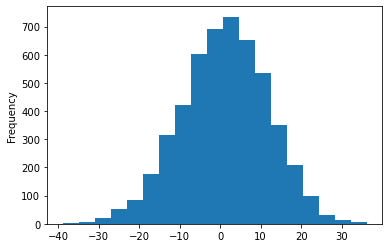

In [12]:
passing.passing_epa.plot.hist(bins=19)

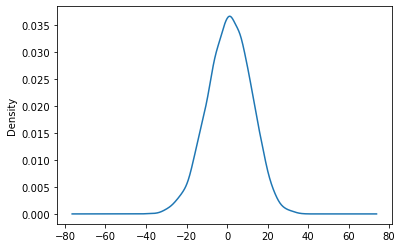

In [13]:
passing.passing_epa.plot.kde()

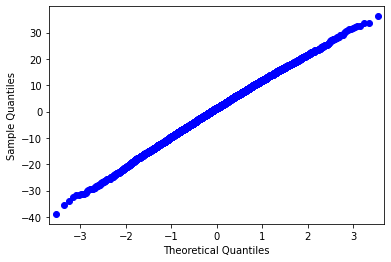

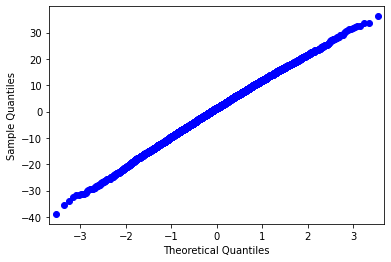

In [14]:
sm.qqplot(passing.passing_epa)

In [15]:
# Looks normal, creating a variable to normalize passing_epa

passing_epa_mean = np.mean(passing.passing_epa)
passing_epa_std = np.std(passing.passing_epa)
passing['passing_epa_standardized'] = passing.apply(lambda x: (x.passing_epa - passing_epa_mean)/passing_epa_std, axis=1)
passing.head()

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,7.779734,3.0,30.0,1.681309,0.0,2.0,4.0,1.0,1.0,0.0,0.472651
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,24.116820,3.0,15.0,0.272050,0.0,1.0,4.0,1.0,1.0,0.0,1.515659
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,-3.078329,3.0,7.0,1.793058,0.0,3.0,6.0,0.0,0.0,1.0,-0.552992
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,0.591515,4.0,23.0,0.222908,1.0,1.0,3.0,0.0,0.0,1.0,-0.063069
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,10.352312,3.0,10.0,1.929123,0.0,1.0,3.0,1.0,0.0,0.0,0.690009


In [16]:
# Komolgorov smirnov test for normality

stats.kstest(passing.passing_epa_standardized, stats.norm.cdf)

KstestResult(statistic=0.013328090454991282, pvalue=0.3334579452915355)

In [17]:
# Want to also take a look at using passing epa per play

passing['passing_epa_per_attempt'] = passing.apply(lambda x: x.passing_epa/x.total_pass_attempts, axis=1)

In [18]:
# See best and worst performances

best_pass_performances_per_attempt = passing.sort_values(by='passing_epa_per_attempt', ascending=False)
best_pass_performances_per_attempt.head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt
3164,2019,1,BAL,MIA,59,10,L. Jackson,20,324.0,17.0,29.052437,5.0,180.0,144.0,13.578998,18.363401,28.355213,29.370678,2.0,7.0,0.318240,0.0,1.0,1.0,0.0,0.0,0.0,2.618780,1.452622
3477,2019,10,BAL,CIN,49,13,L. Jackson,16,223.0,15.0,23.079035,3.0,161.0,62.0,17.368032,6.181651,35.705547,26.853405,6.0,75.0,3.774369,1.0,0.0,2.0,0.0,0.0,0.0,2.060285,1.442440
673,2015,1,TEN,TB,42,14,M. Mariota,15,209.0,13.0,19.146578,4.0,103.0,106.0,13.125648,11.983685,21.860682,18.121532,2.0,6.0,-1.025045,0.0,2.0,2.0,0.0,0.0,0.0,1.692613,1.276439
3545,2019,12,BAL,LA,45,6,L. Jackson,20,169.0,15.0,23.362486,5.0,103.0,66.0,12.074610,17.342770,16.234026,28.800282,8.0,95.0,5.437795,0.0,2.0,5.0,1.0,0.0,0.0,2.086787,1.168124
3636,2019,14,LAC,JAX,45,10,P. Rivers,22,314.0,16.0,25.134481,3.0,104.0,210.0,4.535916,24.373333,16.296179,23.441368,1.0,0.0,-1.693113,0.0,1.0,7.0,1.0,0.0,0.0,2.252463,1.142476
2174,2017,9,LA,NYG,51,17,J. Goff,22,311.0,14.0,25.026323,4.0,137.0,165.0,9.630130,21.530264,1.410007,25.026323,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,2.242351,1.137560
2855,2018,10,PIT,CAR,52,21,B. Roethlisberger,25,328.0,22.0,27.658562,5.0,103.0,225.0,-1.354918,32.869347,17.823008,30.269657,2.0,28.0,2.611095,0.0,1.0,2.0,1.0,0.0,0.0,2.488457,1.106342
543,2014,16,DAL,IND,42,7,T. Romo,20,218.0,18.0,21.829762,4.0,143.0,75.0,6.376352,18.939924,21.323912,25.056824,3.0,28.0,3.227063,0.0,1.0,1.0,0.0,0.0,0.0,1.943482,1.091488
2547,2018,1,TB,NO,48,40,R. Fitzpatrick,28,417.0,21.0,29.170437,4.0,287.0,130.0,24.376322,12.599808,12.812101,30.496738,8.0,39.0,1.326302,1.0,0.0,2.0,1.0,0.0,0.0,2.629812,1.041801
2892,2018,11,TB,NYG,35,38,J. Winston,16,199.0,12.0,16.440530,2.0,143.0,56.0,12.812482,4.945913,15.336225,17.900383,5.0,16.0,1.459851,0.0,0.0,1.0,1.0,0.0,1.0,1.439606,1.027533


In [19]:
# See best and worst performances

worst_pass_performances_per_attempt = passing.sort_values(by='passing_epa_per_attempt', ascending=True)
worst_pass_performances_per_attempt.head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt
5099,2021,17,NYG,CHI,3,29,M. Glennon,11,24.0,4.0,-35.564820,0.0,0.0,24.0,-3.608493,2.536155,-29.181055,-34.458668,1.0,13.0,1.106152,0.0,4.0,5.0,4.0,2.0,2.0,-3.422733,-3.233165
3014,2018,14,WAS,NYG,16,40,M. Sanchez,14,38.0,6.0,-23.086410,0.0,18.0,20.0,-2.269659,2.757070,-30.549362,-23.086410,0.0,0.0,0.000000,0.0,5.0,6.0,0.0,0.0,2.0,-2.256041,-1.649029
1899,2017,1,HOU,JAX,7,29,T. Savage,13,62.0,7.0,-21.264343,0.0,43.0,19.0,-0.387596,3.855704,-13.106459,-21.264343,0.0,0.0,0.000000,0.0,6.0,6.0,2.0,2.0,0.0,-2.085683,-1.635719
2224,2017,11,BUF,LAC,24,54,N. Peterman,14,66.0,6.0,-21.571390,0.0,35.0,31.0,0.533739,4.087936,-16.712300,-22.670650,2.0,4.0,-1.099259,0.0,0.0,3.0,1.0,0.0,5.0,-2.114391,-1.540814
1901,2017,1,IND,LA,9,46,S. Tolzien,18,128.0,9.0,-27.682053,0.0,56.0,72.0,0.497604,3.173638,-10.396017,-22.977230,1.0,3.0,-0.361620,0.0,4.0,5.0,2.0,1.0,2.0,-2.685719,-1.537892
3220,2019,2,MIA,NE,0,43,R. Fitzpatrick,21,89.0,11.0,-31.658140,0.0,60.0,29.0,-1.276343,3.790076,-17.647066,-30.877289,1.0,6.0,0.780851,0.0,4.0,5.0,0.0,0.0,3.0,-3.057471,-1.507530
5051,2021,16,NO,MIA,3,20,I. Book,20,135.0,12.0,-29.729810,0.0,54.0,81.0,-3.106783,8.236957,-7.278275,-28.710238,3.0,6.0,1.019573,0.0,8.0,11.0,0.0,0.0,2.0,-2.877178,-1.486490
4196,2020,12,BAL,PIT,14,19,R. Griffin,12,33.0,7.0,-17.627457,0.0,3.0,30.0,-5.870819,4.009160,-10.938705,-16.362314,7.0,68.0,1.265143,0.0,3.0,5.0,1.0,1.0,1.0,-1.745645,-1.468955
452,2014,13,TEN,HOU,21,45,J. Locker,12,91.0,6.0,-17.394665,1.0,59.0,32.0,5.307749,3.431376,-0.480514,-17.394665,0.0,0.0,0.000000,0.0,2.0,4.0,1.0,1.0,2.0,-1.723880,-1.449555
110,2014,3,TB,ATL,14,56,J. McCown,12,58.0,5.0,-16.461634,0.0,42.0,16.0,0.431650,-2.954062,-17.128475,-11.046642,0.0,0.0,0.000000,0.0,1.0,3.0,1.0,1.0,1.0,-1.636645,-1.371803


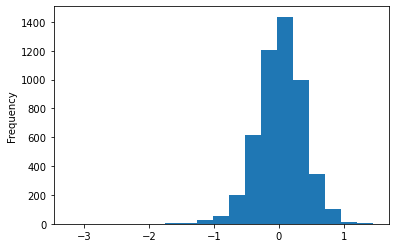

In [20]:
passing.passing_epa_per_attempt.plot.hist(bins=19)

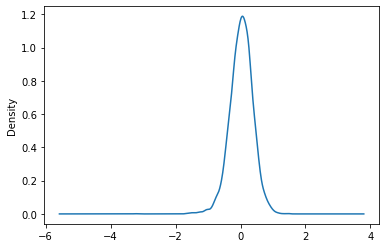

In [21]:
passing.passing_epa_per_attempt.plot.kde()

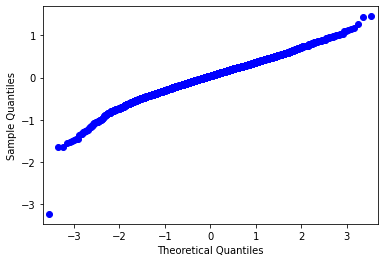

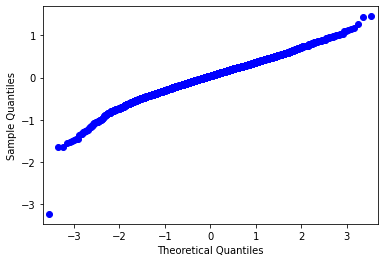

In [22]:
sm.qqplot(passing.passing_epa_per_attempt)

In [23]:
# Glennons performance was so bad, it may need to be removed as an outlier

In [24]:
np.mean(passing.passing_epa_per_attempt)

0.027170364591459075

In [25]:
np.std(passing.passing_epa_per_attempt)

0.3545453691021877

In [26]:
passing_no_glennon = passing[passing.passing_epa_per_attempt >= -3]

In [27]:
np.mean(passing_no_glennon.passing_epa_per_attempt)

0.027822040749591583

In [28]:
np.std(passing_no_glennon.passing_epa_per_attempt)

0.35157138159648216

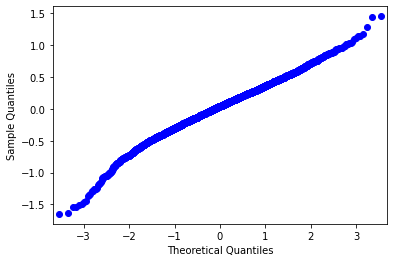

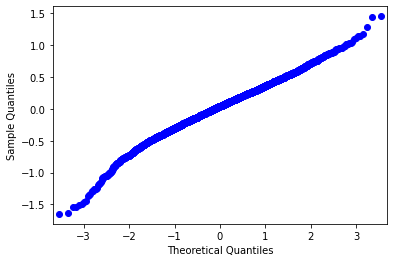

In [29]:
sm.qqplot(passing_no_glennon.passing_epa_per_attempt)

In [30]:
# Looks normal wihtout glennon, creating a variable to normalize passing_epa

passing_epa_pa_mean = np.mean(passing_no_glennon.passing_epa_per_attempt)
passing_epa_pa_std = np.std(passing_no_glennon.passing_epa_per_attempt)
passing['passing_epa_per_attempt_standardized'] = passing.apply(lambda x: (x.passing_epa_per_attempt - passing_epa_pa_mean)/passing_epa_pa_std, axis=1)
passing.head()

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt,passing_epa_per_attempt_standardized
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,7.779734,3.0,30.0,1.681309,0.0,2.0,4.0,1.0,1.0,0.0,0.472651,0.160485,0.377343
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,24.116820,3.0,15.0,0.272050,0.0,1.0,4.0,1.0,1.0,0.0,1.515659,0.410809,1.089357
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,-3.078329,3.0,7.0,1.793058,0.0,3.0,6.0,0.0,0.0,1.0,-0.552992,-0.078571,-0.302621
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,0.591515,4.0,23.0,0.222908,1.0,1.0,3.0,0.0,0.0,1.0,-0.063069,0.016755,-0.031479
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,10.352312,3.0,10.0,1.929123,0.0,1.0,3.0,1.0,0.0,0.0,0.690009,0.255248,0.646885


In [31]:
# Komolgorov smirnov test for normality

# Pretty sure this is approximately normal, KS test might be too sensitive

test_df = passing[np.abs(passing.passing_epa_per_attempt_standardized) < 3]
stats.kstest(test_df.passing_epa_per_attempt_standardized, stats.norm.cdf)

KstestResult(statistic=0.02774913575816415, pvalue=0.0009444896962242093)

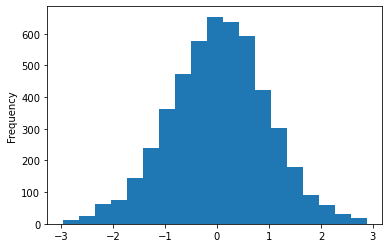

In [32]:
test_df.passing_epa_per_attempt_standardized.plot.hist(bins=19)

In [33]:
passing.sort_values(by='passing_epa_per_attempt_standardized', ascending=True)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt,passing_epa_per_attempt_standardized
5099,2021,17,NYG,CHI,3,29,M. Glennon,11,24.0,4.0,-35.564820,0.0,0.0,24.0,-3.608493,2.536155,-29.181055,-34.458668,1.0,13.0,1.106152,0.0,4.0,5.0,4.0,2.0,2.0,-3.422733,-3.233165,-9.275463
3014,2018,14,WAS,NYG,16,40,M. Sanchez,14,38.0,6.0,-23.086410,0.0,18.0,20.0,-2.269659,2.757070,-30.549362,-23.086410,0.0,0.0,0.000000,0.0,5.0,6.0,0.0,0.0,2.0,-2.256041,-1.649029,-4.769590
1899,2017,1,HOU,JAX,7,29,T. Savage,13,62.0,7.0,-21.264343,0.0,43.0,19.0,-0.387596,3.855704,-13.106459,-21.264343,0.0,0.0,0.000000,0.0,6.0,6.0,2.0,2.0,0.0,-2.085683,-1.635719,-4.731730
2224,2017,11,BUF,LAC,24,54,N. Peterman,14,66.0,6.0,-21.571390,0.0,35.0,31.0,0.533739,4.087936,-16.712300,-22.670650,2.0,4.0,-1.099259,0.0,0.0,3.0,1.0,0.0,5.0,-2.114391,-1.540814,-4.461784
1901,2017,1,IND,LA,9,46,S. Tolzien,18,128.0,9.0,-27.682053,0.0,56.0,72.0,0.497604,3.173638,-10.396017,-22.977230,1.0,3.0,-0.361620,0.0,4.0,5.0,2.0,1.0,2.0,-2.685719,-1.537892,-4.453474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2019,14,LAC,JAX,45,10,P. Rivers,22,314.0,16.0,25.134481,3.0,104.0,210.0,4.535916,24.373333,16.296179,23.441368,1.0,0.0,-1.693113,0.0,1.0,7.0,1.0,0.0,0.0,2.252463,1.142476,3.170492
3545,2019,12,BAL,LA,45,6,L. Jackson,20,169.0,15.0,23.362486,5.0,103.0,66.0,12.074610,17.342770,16.234026,28.800282,8.0,95.0,5.437795,0.0,2.0,5.0,1.0,0.0,0.0,2.086787,1.168124,3.243444
673,2015,1,TEN,TB,42,14,M. Mariota,15,209.0,13.0,19.146578,4.0,103.0,106.0,13.125648,11.983685,21.860682,18.121532,2.0,6.0,-1.025045,0.0,2.0,2.0,0.0,0.0,0.0,1.692613,1.276439,3.551531
3477,2019,10,BAL,CIN,49,13,L. Jackson,16,223.0,15.0,23.079035,3.0,161.0,62.0,17.368032,6.181651,35.705547,26.853405,6.0,75.0,3.774369,1.0,0.0,2.0,0.0,0.0,0.0,2.060285,1.442440,4.023700


In [34]:
# Not sure what value is better between total passing epa standardized or passing epa per play standardized

# Looking at the cases with the biggest differences in the two values

passing['passing_discrepancy'] = passing.apply(lambda x: x.passing_epa_standardized - x.passing_epa_per_attempt_standardized, axis=1)
passing['passing_discrepancy_abs'] = passing.apply(lambda x: np.abs(x.passing_epa_standardized - x.passing_epa_per_attempt_standardized), axis=1)

In [35]:
# Passing epa is higher

passing.sort_values(by='passing_discrepancy', ascending=False).head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt,passing_epa_per_attempt_standardized,passing_discrepancy,passing_discrepancy_abs
5099,2021,17,NYG,CHI,3,29,M. Glennon,11,24.0,4.0,-35.564820,0.0,0.0,24.0,-3.608493,2.536155,-29.181055,-34.458668,1.0,13.0,1.106152,0.0,4.0,5.0,4.0,2.0,2.0,-3.422733,-3.233165,-9.275463,5.852730,5.852730
1899,2017,1,HOU,JAX,7,29,T. Savage,13,62.0,7.0,-21.264343,0.0,43.0,19.0,-0.387596,3.855704,-13.106459,-21.264343,0.0,0.0,0.000000,0.0,6.0,6.0,2.0,2.0,0.0,-2.085683,-1.635719,-4.731730,2.646047,2.646047
3014,2018,14,WAS,NYG,16,40,M. Sanchez,14,38.0,6.0,-23.086410,0.0,18.0,20.0,-2.269659,2.757070,-30.549362,-23.086410,0.0,0.0,0.000000,0.0,5.0,6.0,0.0,0.0,2.0,-2.256041,-1.649029,-4.769590,2.513549,2.513549
4196,2020,12,BAL,PIT,14,19,R. Griffin,12,33.0,7.0,-17.627457,0.0,3.0,30.0,-5.870819,4.009160,-10.938705,-16.362314,7.0,68.0,1.265143,0.0,3.0,5.0,1.0,1.0,1.0,-1.745645,-1.468955,-4.257391,2.511745,2.511745
452,2014,13,TEN,HOU,21,45,J. Locker,12,91.0,6.0,-17.394665,1.0,59.0,32.0,5.307749,3.431376,-0.480514,-17.394665,0.0,0.0,0.000000,0.0,2.0,4.0,1.0,1.0,2.0,-1.723880,-1.449555,-4.202212,2.478332,2.478332
2224,2017,11,BUF,LAC,24,54,N. Peterman,14,66.0,6.0,-21.571390,0.0,35.0,31.0,0.533739,4.087936,-16.712300,-22.670650,2.0,4.0,-1.099259,0.0,0.0,3.0,1.0,0.0,5.0,-2.114391,-1.540814,-4.461784,2.347393,2.347393
110,2014,3,TB,ATL,14,56,J. McCown,12,58.0,5.0,-16.461634,0.0,42.0,16.0,0.431650,-2.954062,-17.128475,-11.046642,0.0,0.0,0.000000,0.0,1.0,3.0,1.0,1.0,1.0,-1.636645,-1.371803,-3.981055,2.344410,2.344410
2363,2017,14,NYJ,DEN,0,23,J. McCown,12,46.0,6.0,-14.983055,0.0,19.0,27.0,-2.176747,4.228722,-14.623327,-13.526593,1.0,8.0,1.456461,0.0,4.0,4.0,1.0,1.0,1.0,-1.498402,-1.248588,-3.630585,2.132183,2.132183
1749,2016,15,HOU,JAX,21,20,B. Osweiler,11,48.0,6.0,-12.260128,0.0,8.0,40.0,-3.809563,5.301351,-21.447060,-12.260128,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,-1.243817,-1.114557,-3.249352,2.005535,2.005535
4935,2021,13,HOU,IND,0,31,T. Taylor,13,45.0,5.0,-15.367715,0.0,-1.0,46.0,-5.441951,4.454390,-30.702580,-9.681416,3.0,15.0,0.426625,0.0,2.0,5.0,1.0,1.0,1.0,-1.534367,-1.182132,-3.441560,1.907193,1.907193


In [36]:
# Passing epa per play is higher

passing.sort_values(by='passing_discrepancy', ascending=True).head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt,passing_epa_per_attempt_standardized,passing_discrepancy,passing_discrepancy_abs
3477,2019,10,BAL,CIN,49,13,L. Jackson,16,223.0,15.0,23.079035,3.0,161.0,62.0,17.368032,6.181651,35.705547,26.853405,6.0,75.0,3.774369,1.0,0.0,2.0,0.0,0.0,0.0,2.060285,1.442440,4.023700,-1.963414,1.963414
673,2015,1,TEN,TB,42,14,M. Mariota,15,209.0,13.0,19.146578,4.0,103.0,106.0,13.125648,11.983685,21.860682,18.121532,2.0,6.0,-1.025045,0.0,2.0,2.0,0.0,0.0,0.0,1.692613,1.276439,3.551531,-1.858918,1.858918
832,2015,6,PIT,ARI,25,13,L. Jones,13,168.0,8.0,12.051482,2.0,76.0,92.0,8.048028,9.023296,8.476951,12.051482,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.029243,0.927037,2.557703,-1.528459,1.528459
5399,2022,6,PIT,TB,20,18,M. Trubisky,12,144.0,9.0,10.284818,1.0,95.0,49.0,7.196151,8.157844,9.707415,10.202077,3.0,8.0,-0.082741,0.0,1.0,1.0,0.0,0.0,0.0,0.864066,0.857068,2.358685,-1.494619,1.494619
4529,2021,2,HOU,CLE,21,31,T. Taylor,11,125.0,10.0,8.903345,1.0,47.0,78.0,0.059378,9.583706,19.012945,12.336523,1.0,15.0,3.433178,1.0,0.0,1.0,0.0,0.0,0.0,0.734902,0.809395,2.223085,-1.488183,1.488183
4382,2020,16,MIA,LV,26,25,R. Fitzpatrick,13,182.0,9.0,11.621787,1.0,100.0,82.0,5.668966,8.810009,11.184160,11.621787,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.989068,0.893984,2.463686,-1.474618,1.474618
3164,2019,1,BAL,MIA,59,10,L. Jackson,20,324.0,17.0,29.052437,5.0,180.0,144.0,13.578998,18.363401,28.355213,29.370678,2.0,7.0,0.318240,0.0,1.0,1.0,0.0,0.0,0.0,2.618780,1.452622,4.052662,-1.433882,1.433882
2892,2018,11,TB,NYG,35,38,J. Winston,16,199.0,12.0,16.440530,2.0,143.0,56.0,12.812482,4.945913,15.336225,17.900383,5.0,16.0,1.459851,0.0,0.0,1.0,1.0,0.0,1.0,1.439606,1.027533,2.843551,-1.403945,1.403945
4076,2020,8,MIN,GB,28,22,K. Cousins,14,160.0,11.0,12.013542,1.0,29.0,131.0,-6.341682,21.940900,-0.430987,12.013542,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.025696,0.858110,2.361649,-1.335953,1.335953
905,2015,9,BUF,MIA,33,17,T. Taylor,12,181.0,11.0,8.884846,1.0,136.0,45.0,9.363623,5.262109,28.472229,12.268419,7.0,48.0,3.383573,0.0,3.0,3.0,0.0,0.0,0.0,0.733173,0.740404,2.026848,-1.293676,1.293676


In [37]:
# See where they are nearly identical

passing.sort_values(by='passing_discrepancy_abs', ascending=True).head(20)

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt,passing_epa_per_attempt_standardized,passing_discrepancy,passing_discrepancy_abs
1696,2016,13,TB,LAC,28,21,J. Winston,31,282.0,20.0,10.551491,1.0,170.0,110.0,10.958528,12.449821,6.961984,12.304693,1.0,5.0,1.753202,0.0,1.0,5.0,0.0,0.0,1.0,0.888999,0.340371,0.889005,-0.000006,0.000006
1155,2015,16,CAR,ATL,13,20,C. Newton,30,142.0,17.0,-13.910295,0.0,69.0,73.0,-3.847548,10.401883,-10.218033,-8.482169,7.0,46.0,5.428125,1.0,2.0,2.0,1.0,1.0,0.0,-1.398102,-0.463676,-1.398005,-0.000097,0.000097
685,2015,2,DAL,PHI,20,10,T. Romo,27,195.0,18.0,-1.542091,0.0,116.0,79.0,1.237310,10.987061,1.212793,-0.560469,1.0,12.0,0.981622,0.0,3.0,3.0,1.0,1.0,0.0,-0.241714,-0.057114,-0.241591,-0.000123,0.000123
2093,2017,6,TEN,IND,36,22,M. Mariota,32,306.0,23.0,3.958559,1.0,174.0,132.0,6.079705,16.867891,8.918364,5.951876,1.0,1.0,1.993316,0.0,1.0,6.0,0.0,0.0,1.0,0.272580,0.123705,0.272727,-0.000147,0.000147
3793,2019,19,SEA,GB,23,28,R. Wilson,31,277.0,21.0,10.643015,1.0,187.0,90.0,6.439506,16.083065,13.037517,15.426611,7.0,64.0,4.783596,0.0,5.0,10.0,0.0,0.0,0.0,0.897556,0.343323,0.897402,0.000153,0.000153
5162,2021,19,LV,CIN,19,26,D. Carr,53,310.0,29.0,0.457404,1.0,187.0,123.0,12.020011,15.541854,-6.101180,2.723135,1.0,20.0,2.265730,0.0,3.0,3.0,1.0,1.0,1.0,-0.054767,0.008630,-0.054589,-0.000179,0.000179
3133,2018,17,SF,LA,32,48,N. Mullens,34,284.0,23.0,1.887966,3.0,132.0,150.0,6.691172,17.856262,5.462560,1.887966,0.0,0.0,0.000000,0.0,3.0,9.0,0.0,0.0,3.0,0.078986,0.055528,0.078807,0.000179,0.000179
2673,2018,5,IND,NE,24,38,A. Luck,59,365.0,38.0,0.410193,3.0,239.0,126.0,22.780520,6.752945,-0.609820,5.489265,0.0,0.0,0.000000,0.0,1.0,6.0,1.0,1.0,2.0,-0.059181,0.006952,-0.059361,0.000180,0.000180
3962,2020,5,JAX,HOU,14,30,G. Minshew II,49,301.0,31.0,0.526511,2.0,143.0,158.0,-1.504999,24.055182,2.095052,2.624801,4.0,18.0,2.098290,0.0,3.0,5.0,1.0,1.0,0.0,-0.048306,0.010745,-0.048573,0.000267,0.000267
451,2014,13,TB,CIN,13,14,J. McCown,29,190.0,15.0,-3.938253,0.0,74.0,116.0,-0.911213,10.380757,-12.088894,-3.938253,0.0,0.0,0.000000,0.0,1.0,3.0,1.0,0.0,1.0,-0.465747,-0.135802,-0.465407,-0.000340,0.000340


In [38]:
# Still not sure whats best. Per attempt gives higher praise for good games w few passes and penalized more heavily for
# bad games with fewer passes. Going to start with total, but may need to change this later.

passing_to_save = passing.copy()
passing_to_save['passing_value'] = passing_to_save.passing_epa_standardized
passing_to_save.head()

,season,week,team,opponent,score,opponent_score,qb,total_pass_attempts,total_passing_yards,completions,passing_epa,pass_tds,air_yards,yards_after_catch,air_epa,yac_epa,avg_cpoe,qb_epa,total_qb_rush_attempts,qb_rush_yards,qb_rushing_epa,qb_rush_tds,sacks_taken_qb,qb_hits_taken_qb,fumbles_qb,lost_fumbles_qb,interceptions_thrown_qb,passing_epa_standardized,passing_epa_per_attempt,passing_epa_per_attempt_standardized,passing_discrepancy,passing_discrepancy_abs,passing_value
0,2014,1,ARI,LAC,18,17,C. Palmer,38,304.0,24.0,6.098425,2.0,196.0,108.0,10.800692,13.884696,3.160065,7.779734,3.0,30.0,1.681309,0.0,2.0,4.0,1.0,1.0,0.0,0.472651,0.160485,0.377343,0.095308,0.095308,0.472651
1,2014,1,ATL,NO,37,34,M. Ryan,42,448.0,31.0,17.253965,3.0,253.0,195.0,8.815695,16.383532,6.128030,24.116820,3.0,15.0,0.272050,0.0,1.0,4.0,1.0,1.0,0.0,1.515659,0.410809,1.089357,0.426303,0.426303,1.515659
2,2014,1,BAL,CIN,16,23,J. Flacco,62,345.0,35.0,-4.871386,1.0,221.0,124.0,10.962930,14.313325,-11.889451,-3.078329,3.0,7.0,1.793058,0.0,3.0,6.0,0.0,0.0,1.0,-0.552992,-0.078571,-0.302621,-0.250372,0.250372,-0.552992
3,2014,1,BUF,CHI,23,20,E. Manuel,22,173.0,16.0,0.368607,1.0,93.0,80.0,1.909633,9.530254,11.150598,0.591515,4.0,23.0,0.222908,1.0,1.0,3.0,0.0,0.0,1.0,-0.063069,0.016755,-0.031479,-0.031590,0.031590,-0.063069
4,2014,1,CAR,TB,20,14,D. Anderson,33,230.0,24.0,8.423189,2.0,160.0,70.0,6.298791,10.724494,9.822589,10.352312,3.0,10.0,1.929123,0.0,1.0,3.0,1.0,0.0,0.0,0.690009,0.255248,0.646885,0.043125,0.043125,0.690009


In [39]:
passing_to_save.to_csv('passing_value_model_v2_data/passing_with_value.csv')